<a href="https://colab.research.google.com/github/Gth1205/projects/blob/master/DL_ai_3/W3_Sarcasm_text_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Sarcasm workbook

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [14]:
#Setting up hyperparameters

vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_token = "<OOV>"
training_size = 20000

In [15]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-06-27 18:14:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-06-27 18:14:33 (97.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [16]:
with open("/tmp/sarcasm.json",'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [18]:
#Building a classifier for the sarcasm dataset

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]




In [19]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [22]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [23]:
#Our NN Model

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation= 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')

])


model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
num_epochs = 30

history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data = (testing_padded, testing_labels), verbose = 2)

Epoch 1/30
625/625 - 2s - loss: 0.5711 - accuracy: 0.6978 - val_loss: 0.4018 - val_accuracy: 0.8360
Epoch 2/30
625/625 - 2s - loss: 0.3156 - accuracy: 0.8746 - val_loss: 0.3433 - val_accuracy: 0.8569
Epoch 3/30
625/625 - 2s - loss: 0.2357 - accuracy: 0.9085 - val_loss: 0.3411 - val_accuracy: 0.8575
Epoch 4/30
625/625 - 2s - loss: 0.1891 - accuracy: 0.9274 - val_loss: 0.3776 - val_accuracy: 0.8426
Epoch 5/30
625/625 - 2s - loss: 0.1574 - accuracy: 0.9414 - val_loss: 0.3846 - val_accuracy: 0.8536
Epoch 6/30
625/625 - 2s - loss: 0.1330 - accuracy: 0.9523 - val_loss: 0.4178 - val_accuracy: 0.8462
Epoch 7/30
625/625 - 2s - loss: 0.1140 - accuracy: 0.9608 - val_loss: 0.4559 - val_accuracy: 0.8429
Epoch 8/30
625/625 - 2s - loss: 0.0986 - accuracy: 0.9668 - val_loss: 0.4969 - val_accuracy: 0.8386
Epoch 9/30
625/625 - 2s - loss: 0.0847 - accuracy: 0.9725 - val_loss: 0.5460 - val_accuracy: 0.8365
Epoch 10/30
625/625 - 2s - loss: 0.0732 - accuracy: 0.9768 - val_loss: 0.6111 - val_accuracy: 0.8271

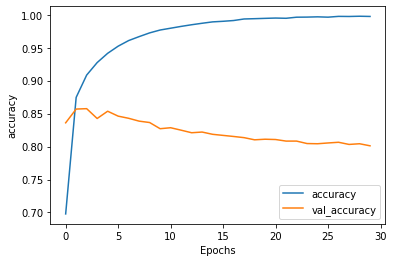

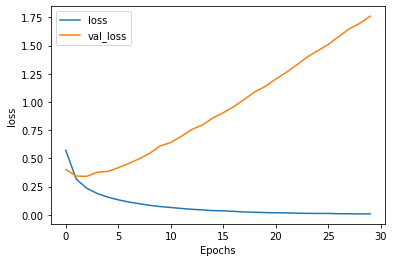

In [26]:
#Plotting the results

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()


plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.9977940e-01]
 [2.1084846e-08]]
